# BUAN 6341.002 - Applied Machine Learning
# Project 1


## Professor : Nassim Sohaee


### Submitted by :
### Prem Kumar Pulluri


In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

np.random.seed(0)

## Part 1 Regression


This dataset is taken from Kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

Import the dataset into a dataframe 'df'.


In [2]:
df = pd.read_csv(r'C:\Users\premp\Downloads\Jupyter Notebooks\housesalesprediction-regression\kc_house_data.csv')

In [3]:
df.shape

(21613, 21)

In [4]:
df.dtypes

id               float64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15       float64
dtype: object

Feature Description:<br>

id: Unique ID<br>
date: Date house was sold<br>
price: Price of house(Target variable)<br>
bedrooms: No. of Bedrooms/House<br>
bathrooms: No. of bathrooms/House<br>
sqft_living: Square feet of living area<br>
sqft_lot: Square feet of parking lot<br>
floors: Total floors in house<br>
waterfront: House which has a view to waterfront.<br>
view: House has been viewed ranging from 0 to 4.<br>
condition: Condition of the house ranging from 1 to 5.<br>
grade: Grade of house ranging from 1 to 13.<br>
sqft_above: Square feet of house apart from basement<br>
sqft_basement: Square feet of the basement<br>
yr_built: Year the house was built.<br>
yr_renovated: Year the house was renovated<br>
zipcode: Zipcode where the house is located<br>
lat: latitude coordinate of house<br>
long: latitude coordinate of house<br>
sqft_living15: Square feet of the living area according to year 2015<br>
sqft_lot15: Square feet of the parking lot according to year 2015<br>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21244 non-null float64
date             21271 non-null object
price            21613 non-null float64
bedrooms         21556 non-null float64
bathrooms        21613 non-null float64
sqft_living      21419 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21430 non-null float64
view             21448 non-null float64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21457 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21475 non-null float64
dtypes: float64(12), int64(8), object(1)
memory usage: 3.5+ MB


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0.0,0.0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650.0
1,6.414100e+09,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0.0,0.0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639.0
2,5.631500e+09,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0.0,0.0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062.0
3,2.487201e+09,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0.0,0.0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000.0
4,1.954401e+09,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0.0,0.0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503.0


In [7]:
#for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21244.0000,21613.0000,21556.0000,21613.0000,21419.0000,21613.0000,21613.0000,21430.0000,21448.0000,21613.0000,21613.0000,21457.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21613.0000,21475.0000
mean,4492987336.5359,540182.1588,3.3718,2.1148,2074.9859,15106.9676,1.4943,0.0076,0.2361,3.4094,7.6569,1782.9428,291.5090,1971.0051,84.4023,98077.9398,47.5601,-122.2139,1986.5525,12463.1835
std,2823384468.3582,367362.2317,0.9311,0.7702,916.6593,41420.5115,0.5400,0.0869,0.7690,0.6507,1.1755,826.5955,442.5750,29.3734,401.6792,53.5050,0.1386,0.1408,685.3913,26009.6286
min,1000102.0000,75000.0000,0.0000,0.0000,290.0000,520.0000,1.0000,0.0000,0.0000,1.0000,1.0000,290.0000,0.0000,1900.0000,0.0000,98001.0000,47.1559,-122.5190,399.0000,651.0000
25%,2102075023.7500,321950.0000,3.0000,1.7500,1420.0000,5040.0000,1.0000,0.0000,0.0000,3.0000,7.0000,1190.0000,0.0000,1951.0000,0.0000,98033.0000,47.4710,-122.3280,1490.0000,5100.0000
50%,3876311370.0000,450000.0000,3.0000,2.2500,1910.0000,7618.0000,1.5000,0.0000,0.0000,3.0000,7.0000,1560.0000,0.0000,1975.0000,0.0000,98065.0000,47.5718,-122.2300,1840.0000,7600.0000
75%,7226750080.0000,645000.0000,4.0000,2.5000,2540.0000,10688.0000,2.0000,0.0000,0.0000,4.0000,8.0000,2200.0000,560.0000,1997.0000,0.0000,98118.0000,47.6780,-122.1250,2360.0000,10018.0000
max,9842300095.0000,7700000.0000,33.0000,8.0000,13540.0000,1651359.0000,3.5000,1.0000,4.0000,5.0000,13.0000,9410.0000,4820.0000,2015.0000,2015.0000,98199.0000,47.7776,-121.3150,6210.0000,871200.0000


From description we can infer that<br>

1)Average house price is $540182 where as max price is $7700000 and min price is $75000<br>
2)Average sqft of lot is 15106 where as max sqft of lot is 1651359 and min sqft of lot is 520<br>
3)Average no. of bedrooms is 3 where as no. of bedrooms is 33 and min no. of bedrooms is 0<br>

Therefore, we can say that outliers exist as values are 3 standard deviations away from mean.


In [9]:
df['bedrooms'].value_counts()

3.0000     9767
4.0000     6882
2.0000     2760
5.0000     1601
6.0000      272
1.0000      199
7.0000       38
8.0000       13
0.0000       13
9.0000        6
10.0000       3
11.0000       1
33.0000       1
Name: bedrooms, dtype: int64

9767 houses have 3 bedrooms/house

In [10]:
df['waterfront'].value_counts()

0.0000    21267
1.0000      163
Name: waterfront, dtype: int64

only 163 houses has a view to a waterfront

In [11]:
df['view'].value_counts()

0.0000    19324
2.0000      963
3.0000      510
1.0000      332
4.0000      319
Name: view, dtype: int64

19489 houses have not been viewed at all whereas 319 houses have been viewed already 4 times

In [12]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

Most houses i.e 14031 are in condition 3

In [13]:
# Check null values in data
df.isnull().sum()

id               369
date             342
price              0
bedrooms          57
bathrooms          0
sqft_living      194
sqft_lot           0
floors             0
waterfront       183
view             165
condition          0
grade              0
sqft_above       156
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15       138
dtype: int64

Dropping features which are not significant

In [14]:
df.drop(['id', 'date'], axis = 1, inplace = True)

Imputing the missing values

In [15]:
df['bedrooms']= df['bedrooms'].transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
df['waterfront']= df['waterfront'].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
df['view']= df['view'].transform(lambda x: x.fillna(x.mode()[0]))

In [18]:
df['sqft_living']=df[['sqft_living', 'bedrooms']].groupby(['bedrooms']).transform(lambda x: x.fillna(x.mean()))

In [19]:
df['sqft_above']=df[['sqft_above', 'bedrooms']].groupby(['bedrooms']).transform(lambda x: x.fillna(x.mean()))

In [20]:
df['sqft_lot15']=df[['sqft_lot15', 'bedrooms']].groupby(['bedrooms']).transform(lambda x: x.fillna(x.mean()))

In [21]:
# Check null values in data
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null float64
view             21613 non-null float64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null float64
dtypes: float64(11), int64(8)
memory usage: 3.1 MB


Checking unique values of features

In [23]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [24]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

Converting into correct data type

In [25]:
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int32
bathrooms        21613 non-null int32
sqft_living      21613 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null int32
waterfront       21613 non-null int32
view             21613 non-null int32
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null float64
dtypes: float64(6), int32(5), int64(8)
memory usage: 2.7 MB


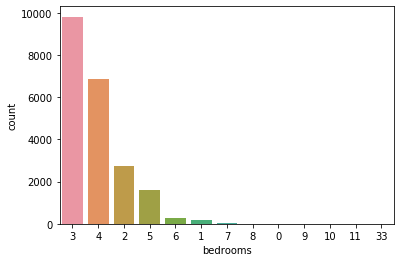

In [27]:
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)


No handles with labels found to put in legend.


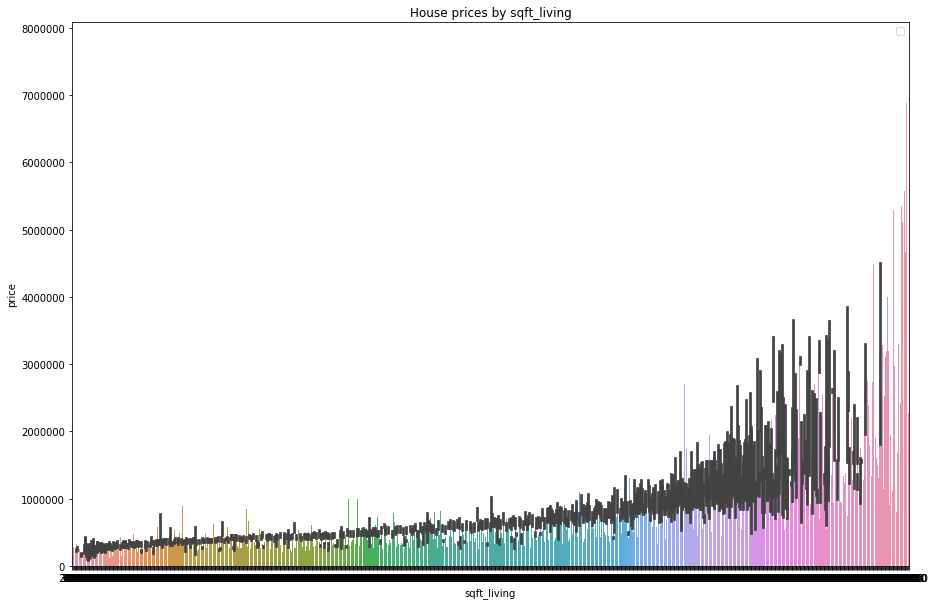

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
sns.barplot(x='sqft_living', y='price', data = df)


(array([1.8283e+04, 3.2240e+03, 9.9000e+01, 5.0000e+00, 2.0000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <a list of 5 Patch objects>)

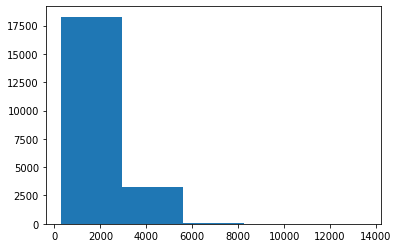

In [29]:
plt.hist('sqft_living', data = df, bins = 5)

Most of the houses have living area around 2000 Sqft

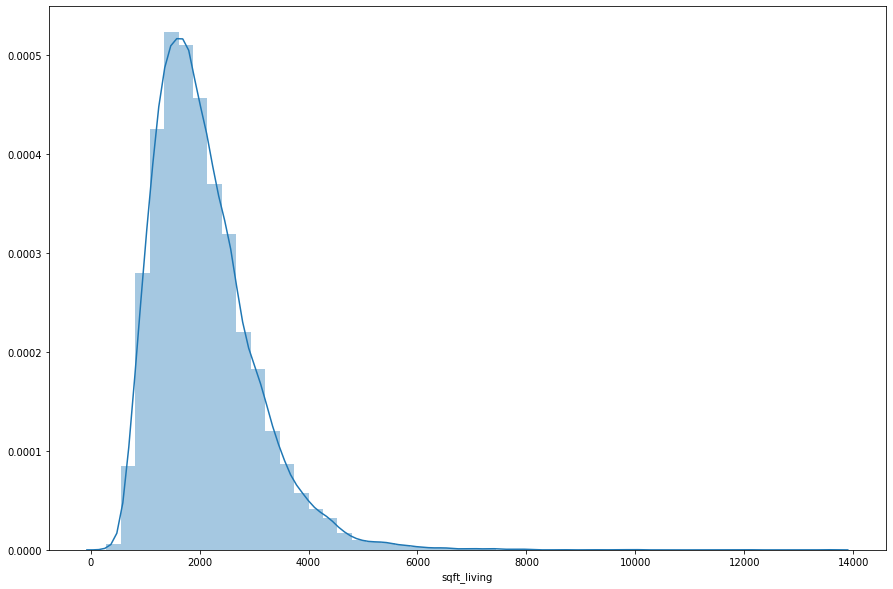

In [30]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

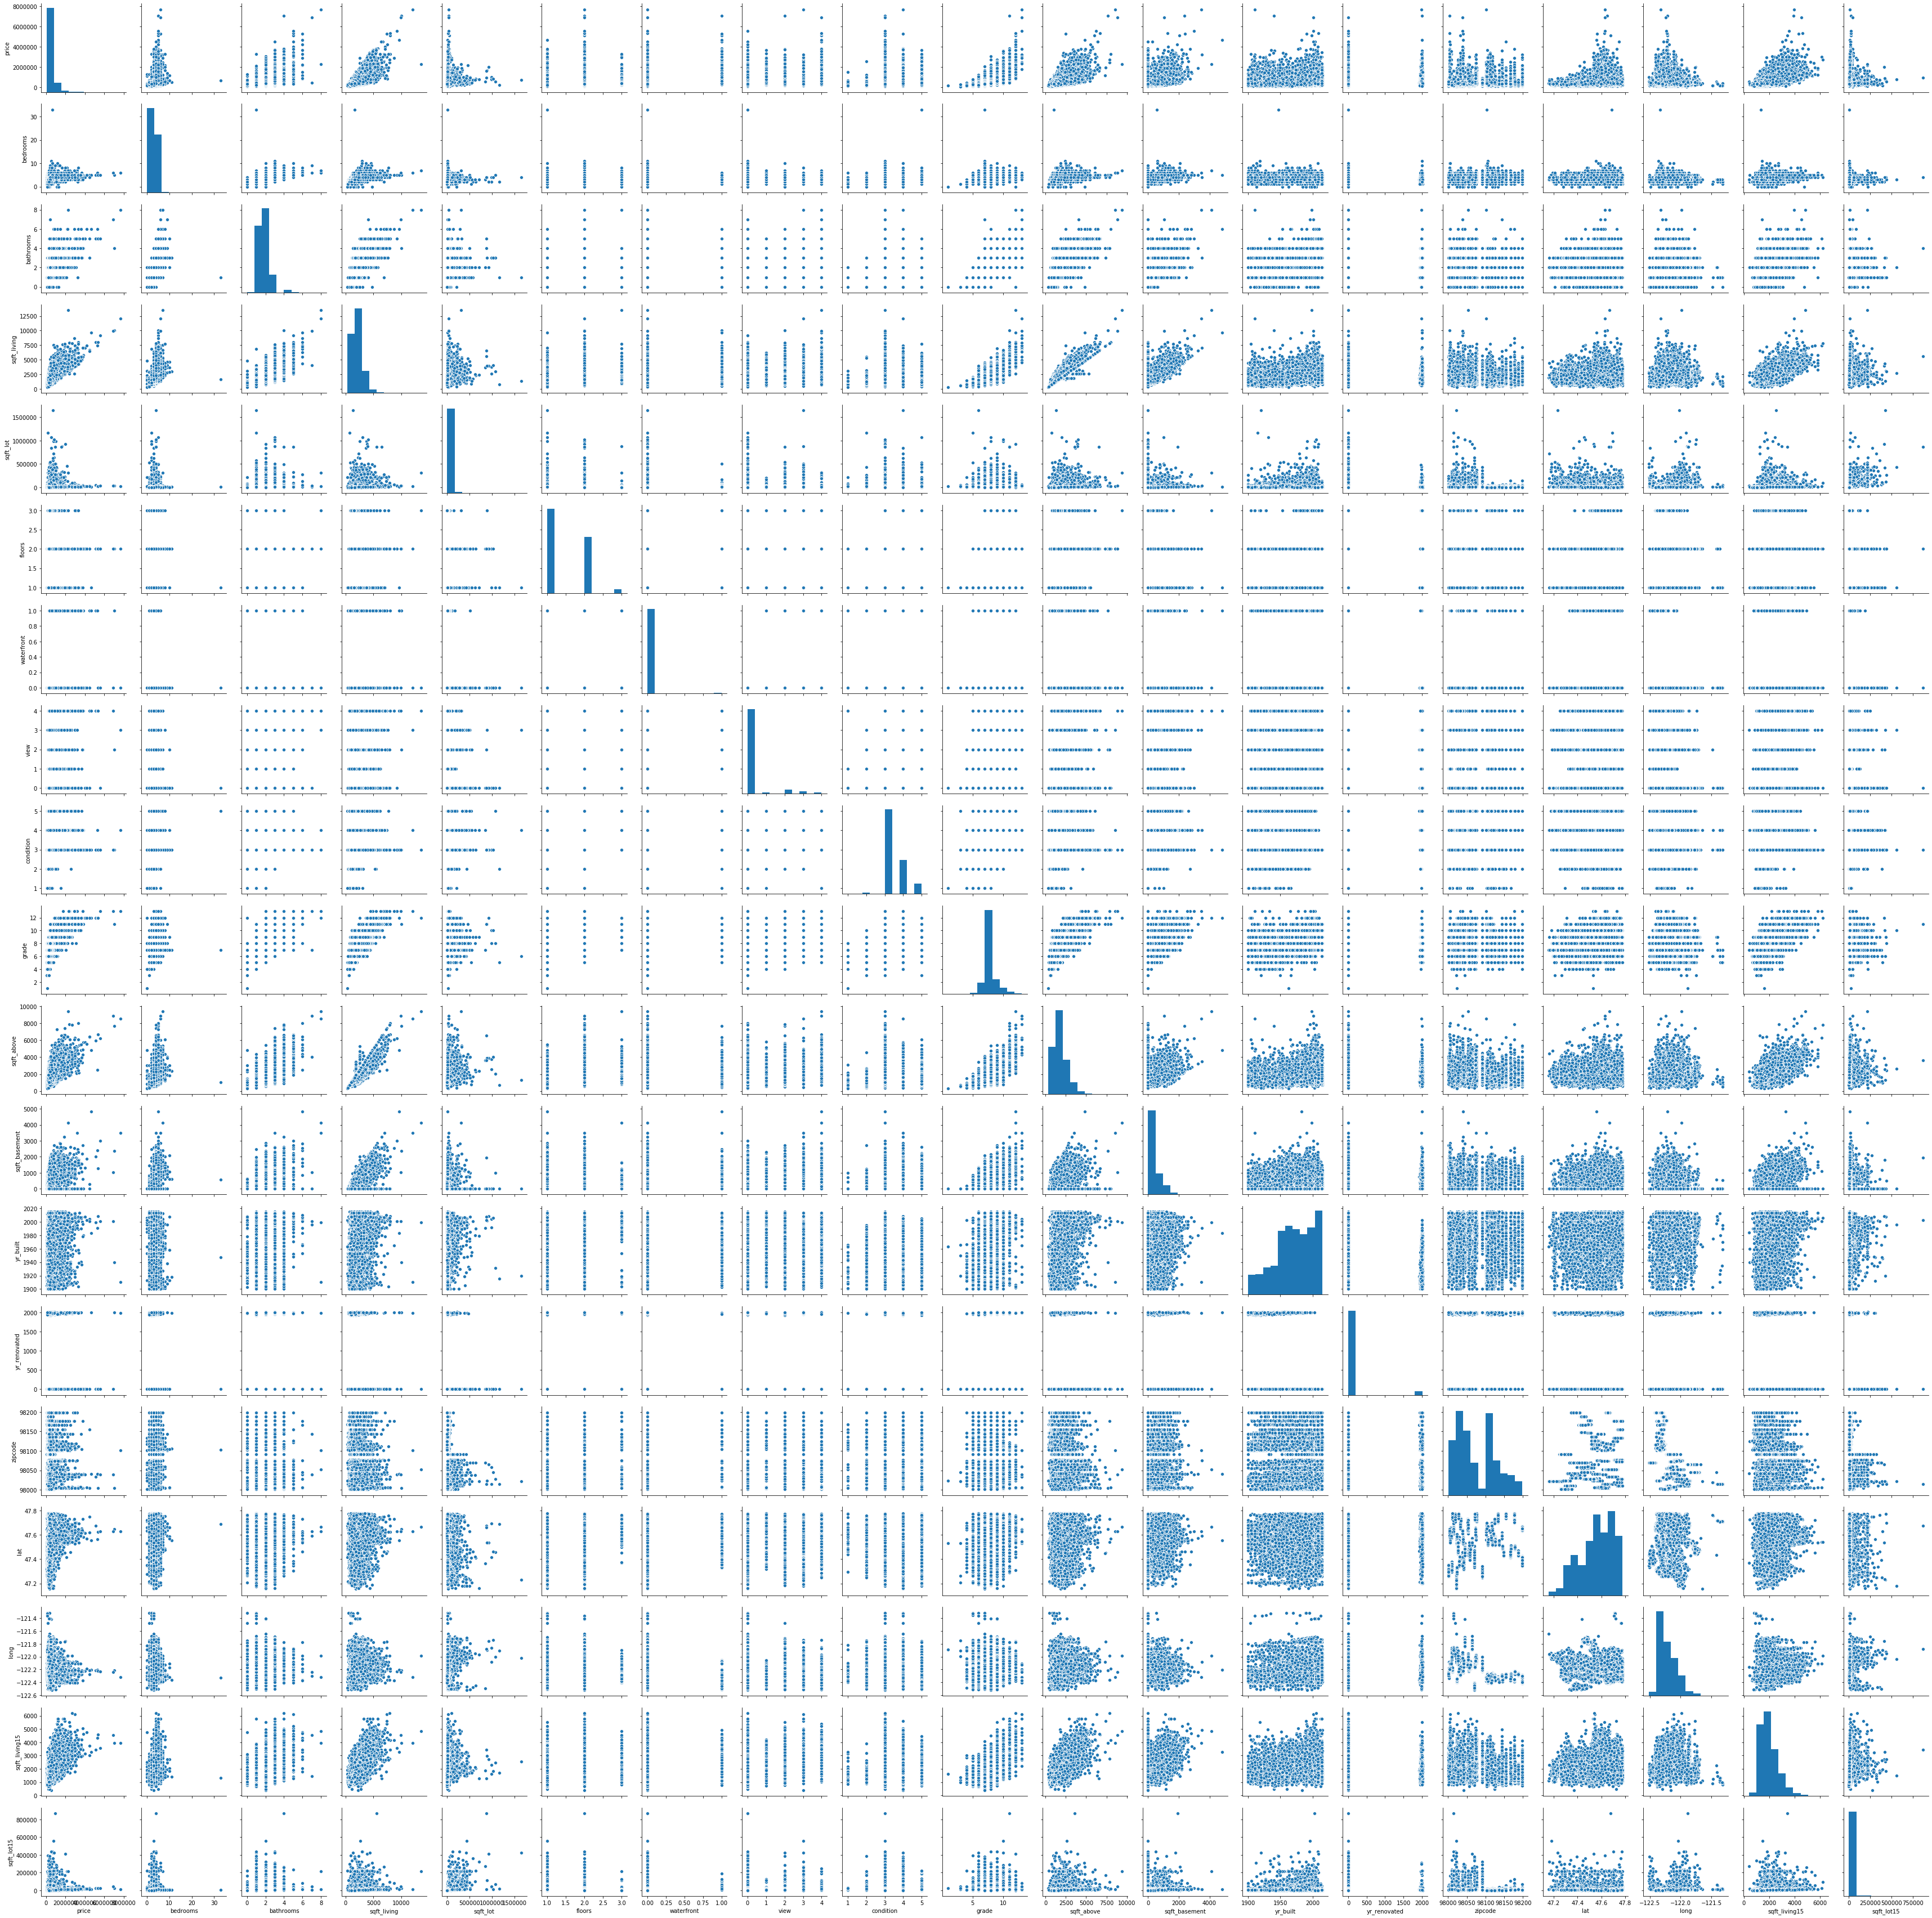

In [31]:
sns.pairplot(df)
plt.show()

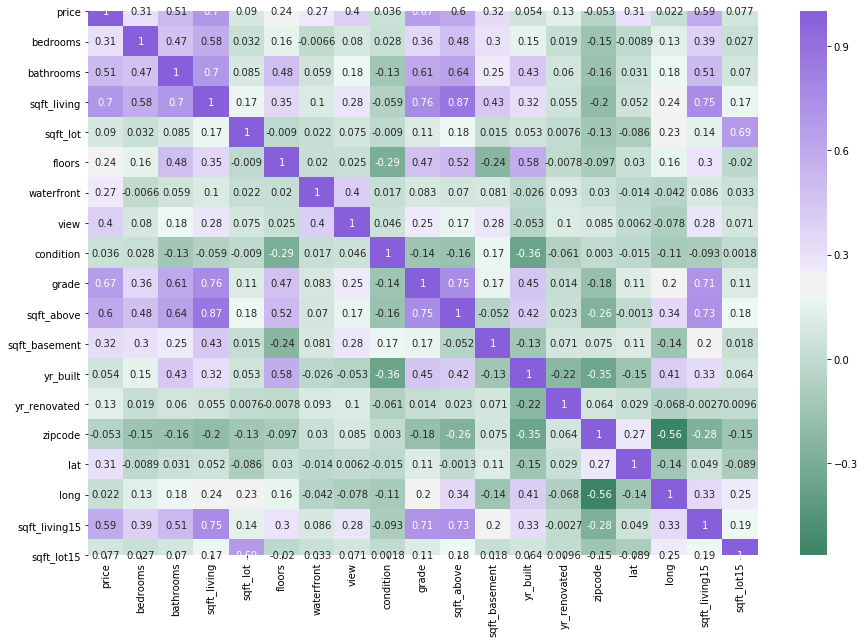

In [32]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(150, 275, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

correlation_heatmap(df)

From the correlation matrix, we can see that price has the highest correlation coefficient with sqft_living

In [33]:
X = df.drop(['price'], axis = 1)
y = df['price']

## Splitting the dataset into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split


X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling the data

In [35]:
# Robust scaler is used because it is not sensitve to outliers
from sklearn import preprocessing

sc = preprocessing.RobustScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [37]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.0000,-1.0000,-0.3038,-0.3659,0.0000,0.0000,0.0000,1.0000,0.0000,-0.4851,0.8772,-0.7609,0.0000,0.5952,0.5893,-0.4310,-0.0805,-0.2480
1,0.0000,0.0000,-0.1162,0.6006,0.0000,0.0000,0.0000,1.0000,1.0000,-0.3465,1.0000,0.1087,0.0000,-0.7024,-0.0764,0.4064,0.5402,0.4166
2,0.0000,-1.0000,-0.7327,0.4003,0.0000,0.0000,0.0000,0.0000,1.0000,-0.4653,0.0000,0.2609,0.0000,0.1071,0.2555,0.9631,-0.1494,0.4490
3,1.0000,0.0000,0.2681,-0.0897,1.0000,0.0000,0.0000,0.0000,1.0000,0.6436,0.0000,0.3913,0.0000,-0.4048,-0.7421,0.2389,0.1494,-0.1239
4,0.0000,0.0000,-0.0983,-0.4975,1.0000,0.0000,0.0000,0.0000,0.0000,-0.3168,0.9825,0.2174,0.0000,0.6429,0.3547,-0.6429,-0.0575,-0.5718


In [38]:
X_test_df = pd.DataFrame(X_test, columns= X.columns)
X_test_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-1.0000,-1.0000,-0.4289,-1.0456,2.0000,0.0000,0.0000,0.0000,0.0000,-0.1287,0.0000,0.5217,0.0000,0.7143,0.7255,-0.2882,-0.4713,-1.1950
1,1.0000,1.0000,0.5711,7.7904,1.0000,0.0000,0.0000,1.0000,5.0000,3.0792,0.0000,0.2826,0.0000,-0.7143,0.3012,0.3325,2.7471,6.6979
2,-1.0000,-2.0000,-0.4200,-0.6846,0.0000,0.0000,0.0000,0.0000,0.0000,-0.3564,0.4211,-1.3261,0.0000,0.5000,0.4749,-0.6527,-0.4598,-0.6645
3,-1.0000,-1.0000,-0.6969,-0.8713,0.0000,0.0000,0.0000,1.0000,1.0000,-0.4257,0.0000,-1.0435,0.0000,0.5238,0.3440,-0.6182,-0.1839,-0.8847
4,1.0000,0.0000,1.1348,0.3547,1.0000,0.0000,2.0000,0.0000,2.0000,1.6040,0.0000,0.5870,0.0000,1.0714,0.9664,-0.2241,0.6897,1.5299


# Various Regression Techniques

## Linear Regression

In [39]:
# Linear Regression
# Without Hyper Parameters Tuning and Cross-validation

# import the model
from sklearn.linear_model import LinearRegression
# instantiate the model
lreg = LinearRegression()
# fit the model
lreg.fit(X_train, y_train)
# evaluate the model
prediction = lreg.predict(X_test)
train_score=lreg.score(X_train, y_train)
test_score=lreg.score(X_test, y_test)

from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print('Train score: ',train_score)
print('Test score:', test_score)

r_square: 0.5997667082731766
Train score:  0.7020099817355947
Test score: 0.6964215203516089


In [40]:
# Linear Regression
# With Cross-validation

from sklearn.model_selection import cross_val_score


scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {}".format(scores.mean()))

Cross-validation scores: [0.68365001 0.67132124 0.70295132 0.71666107 0.71379983]
Average cross-validation score: 0.6976766921846608


## KNN Regressor

In [41]:
# kNearestNeighbors
# Without Cross-validation

from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []
r_square_list = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    prediction = knn_reg.predict(X_test)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    r_square_list.append(metrics.r2_score(prediction, y_test))

print('Train_score:', train_score_array)
print('Test_score:', test_score_array)
print("r_square:",r_square_list)


Train_score: [0.9985036808806476, 0.9067034076455652, 0.8690281320783289, 0.8491446763517282, 0.8327976017568808, 0.8186569718636545, 0.8060525764859876, 0.8000224906701154, 0.7942985977005848]
Test_score: [0.6739673697340742, 0.7493363548629652, 0.754284258357884, 0.761152690935918, 0.7648683693859949, 0.7670632608840638, 0.759116221614263, 0.758028753397624, 0.7539788172146523]
r_square: [0.6352813283466727, 0.6934241576314938, 0.6663191812598324, 0.6634091196751299, 0.6612102858852389, 0.6498269348414512, 0.6276210414300842, 0.6195641055864547, 0.603391094401999]


Text(0, 0.5, 'MSE')

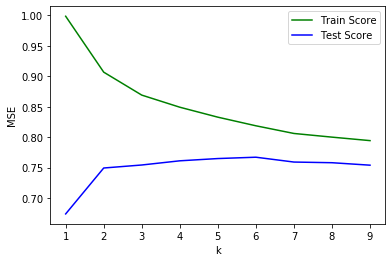

In [42]:
x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [43]:
# kNearestNeighbors
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

knn_reg = KNeighborsRegressor()
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))



Parameter grid:
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
Best parameters: {'n_neighbors': 7}
Train_score: 0.8060525764859876
Best cross-validation score: 0.74
Test set score with best parameters: 0.76
r_square: 0.6276210414300842


## Polynomial Regression

In [44]:
# Polynomial Regression
# With Hyper Parameters Tuning and Cross-validation

from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import metrics

train_score_list = []
cv_score_list = []
test_score_list = []
r_square_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores = cross_val_score(lreg, X_train_poly, y_train, cv=5)
    cv_score_list.append(scores.mean())
    lreg.fit(X_train_poly, y_train) 
    prediction = lreg.predict(X_test_poly)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    r_square_list.append(metrics.r2_score(prediction, y_test))
    



print("r_square:",r_square_list)
print("Average cross-validation score: {}".format(cv_score_list))
print('Train score: ',train_score_list)
print('Test score:', test_score_list)

r_square: [0.5997667082731758, 0.7609677803009047]
Average cross-validation score: [0.6976766921846611, 0.8064359768897262]
Train score:  [0.7020099817355946, 0.8338208251710697]
Test score: [0.6964215203516089, 0.8070753851846806]


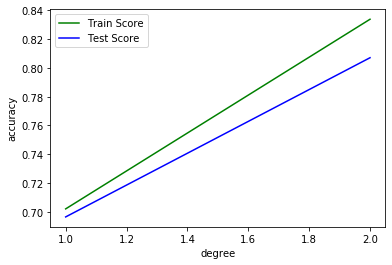

In [45]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

## Ridge

In [46]:
# Ridge
# Without Cross-validation

from  sklearn.linear_model import Ridge
from sklearn import metrics

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r_square_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    prediction = ridge.predict(X_test)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    r_square_list.append(metrics.r2_score(prediction, y_test))
    
print("r_square:",r_square_list)    
print('Train_score:', train_score_list)
print('Test_score:', test_score_list)



r_square: [0.5997669113222475, 0.5997687266717143, 0.5997857000270079, 0.5998525390666128, 0.5967785162234687]
Train_score: [0.7020099816013093, 0.7020099683281836, 0.7020086618376337, 0.7018963989552027, 0.6981663164367896]
Test_score: [0.6964221283282638, 0.6964275856527449, 0.6964807476354465, 0.6968897273448392, 0.6966261024398874]


Text(0.5, 0, '$\\alpha$')

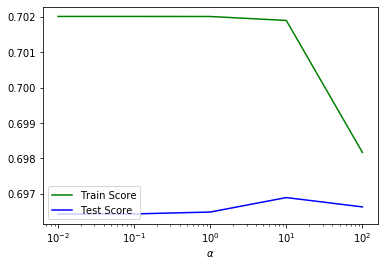

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [48]:
# Ridge
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
print("Parameter grid:\n{}".format(param_grid))

ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))


Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
Best parameters: {'alpha': 1}
Train_score: 0.7020086618376337
Best cross-validation score: 0.70
Test set score with best parameters: 0.70
r_square: 0.5997857000270079


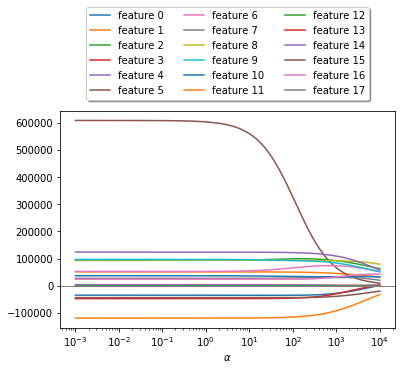

In [49]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,18):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso

In [50]:
# Lasso
# Without Cross-validation

from sklearn.linear_model import Lasso
from sklearn import metrics

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r_square_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    prediction = lasso.predict(X_test)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    r_square_list.append(metrics.r2_score(prediction, y_test))
    

print("r_square:",r_square_list) 
print('Train_score:', train_score_list)
print('Test_score:', test_score_list)



r_square: [0.5997666677049307, 0.5997663038373275, 0.5997626512960303, 0.5997252489460958, 0.5992858662540852]
Train_score: [0.7020099817353977, 0.7020099817158343, 0.7020099797660355, 0.7020097890666454, 0.701993426559332]
Test_score: [0.6964215398898497, 0.696421715659042, 0.6964234723969746, 0.6964409246656672, 0.6966055764456467]


Text(0.5, 0, '$\\alpha$')

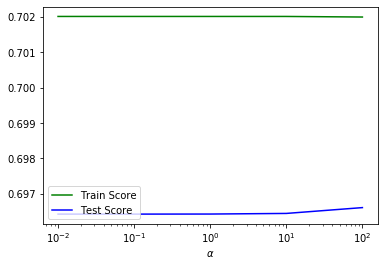

In [51]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [52]:
# Lasso
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
print("Parameter grid:\n{}".format(param_grid))

lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
Best parameters: {'alpha': 100}
Train_score: 0.701993426559332
Best cross-validation score: 0.70
Test set score with best parameters: 0.70
r_square: 0.5992858662540852


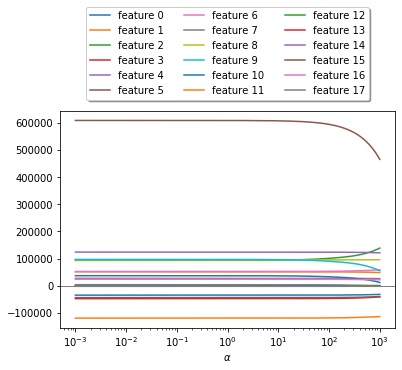

In [53]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,18):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## LinearSVR

In [54]:
# LinearSVR
# Without Hyper Parameters Tuning and Cross-validation

from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(X_train,y_train)
prediction = svr.predict(X_test)
train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)

from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print('Train score: ',train_score)
print('Test score:', test_score)

r_square: -17.977953262289045
Train score:  -1.470296621210259
Test score: -1.6719714897437827


In [55]:
# LinearSVR
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
print("Parameter grid:\n{}".format(param_grid))

svr = LinearSVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
Best parameters: {'C': 1000}
Train_score: 0.6317047520330465
Best cross-validation score: 0.62
Test set score with best parameters: 0.65
r_square: 0.22499436402011308


## SVR with kernel 'rbf'

In [56]:
# SVR with kernel 'rbf'
# Without Hyper Parameters Tuning and Cross-validation

from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
prediction = svr.predict(X_test)
train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)

from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print('Train score: ',train_score)
print('Test score:', test_score)

r_square: -184687.74917384377
Train score:  -0.05572487979555696
Test score: -0.04611754697927273


In [57]:
# SVR with kernel 'rbf'
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Train_score: 0.08965525320302425
Best cross-validation score: 0.07
Test set score with best parameters: 0.12
r_square: -33.68351122435288


## SVR with kernel 'linear'

In [58]:
# SVR with kernel 'linear'
# Without Hyper Parameters Tuning and Cross-validation

from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
prediction = svr.predict(X_test)
train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)

from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print('Train score: ',train_score)
print('Test score:', test_score)

r_square: -49.808206316503075
Train score:  0.08545765817882911
Test score: 0.09428411591934094


In [59]:
# SVR with kernel 'linear'
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100}
Train_score: 0.6070926233438106
Best cross-validation score: 0.60
Test set score with best parameters: 0.63
r_square: 0.056833439596680746


## SVR with kernel 'poly'

In [4]:
# SVR with kernel 'poly'
# Without Hyper Parameters Tuning and Cross-validation

from sklearn.svm import SVR

svr = SVR(kernel='poly')
svr.fit(X_train,y_train)
prediction = svr.predict(X_test)
train_score=svr.score(X_train, y_train)
test_score=svr.score(X_test, y_test)

from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))
print('Train score: ',train_score)
print('Test score:', test_score)

r_square: -61585.1784444741
Train score: -0.48018794752
Test score: -0.5412692925098


In [6]:
# SVR with kernel 'poly'
# With Hyper Parameters Tuning using Grid Search and Cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             'degree': [1, 2, 3]}
print("Parameter grid:\n{}".format(param_grid))

svr = SVR(kernel='poly')
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
prediction=grid_search.predict(X_test)
train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print ('Train_score:', train_score) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score with best parameters: {:.2f}".format(test_score))
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3]}
Best parameters: {'C': 100, 'gamma': 0.1, 'degree': 2}
Train_score: 0.44281754285
Best cross-validation score: 0.43
Test set score with best parameters: 0.46
r_square: -11.133894714851


## Report

In [2]:
reg_report = pd.DataFrame(index = '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16'.split(), columns='ModelName TrainScore TestScore RSquareScore CVScore'.split())


reg_report['ModelName']['0'] = 'Linear Regression'
reg_report['TrainScore']['0'] = 0.70
reg_report['TestScore']['0'] = 0.69
reg_report['RSquareScore']['0'] = 0.59

reg_report['ModelName']['1'] = 'Linear Regression with CV'
reg_report['CVScore']['1'] = 0.69

reg_report['ModelName']['2'] = 'KNN Regressor'
reg_report['TrainScore']['2'] = 0.83
reg_report['TestScore']['2'] = 0.76
reg_report['RSquareScore']['2'] = 0.66

reg_report['ModelName']['3'] = 'KNN Regressor with GridCV'
reg_report['TrainScore']['3'] = 0.80
reg_report['TestScore']['3'] = 0.76
reg_report['RSquareScore']['3'] = 0.62
reg_report['CVScore']['3'] = 0.74

reg_report['ModelName']['4'] = 'Polynomial Regression'
reg_report['TrainScore']['4'] = 0.83
reg_report['TestScore']['4'] = 0.80
reg_report['RSquareScore']['4'] = 0.76
reg_report['CVScore']['4'] = 0.80

reg_report['ModelName']['5'] = 'Ridge'
reg_report['TrainScore']['5'] = 0.70
reg_report['TestScore']['5'] = 0.69
reg_report['RSquareScore']['5'] = 0.59

reg_report['ModelName']['6'] = 'Ridge with GridCV'
reg_report['TrainScore']['6'] = 0.70
reg_report['TestScore']['6'] = 0.70
reg_report['RSquareScore']['6'] = 0.59
reg_report['CVScore']['6'] = 0.70

reg_report['ModelName']['7'] = 'Lasso'
reg_report['TrainScore']['7'] = 0.70
reg_report['TestScore']['7'] = 0.69
reg_report['RSquareScore']['7'] = 0.59

reg_report['ModelName']['8'] = 'Lasso with GridCV'
reg_report['TrainScore']['8'] = 0.70
reg_report['TestScore']['8'] = 0.70
reg_report['RSquareScore']['8'] = 0.59
reg_report['CVScore']['8'] = 0.70

reg_report['ModelName']['9'] = 'LinearSVR'
reg_report['TrainScore']['9'] = -1.47
reg_report['TestScore']['9'] = -1.67
reg_report['RSquareScore']['9'] = -17.97

reg_report['ModelName']['10'] = 'LinearSVR with GridCV'
reg_report['TrainScore']['10'] = 0.63
reg_report['TestScore']['10'] = 0.65
reg_report['RSquareScore']['10'] = 0.22
reg_report['CVScore']['10'] = 0.62

reg_report['ModelName']['11'] = 'SVR rbf'
reg_report['TrainScore']['11'] = -0.05
reg_report['TestScore']['11'] = -0.04
reg_report['RSquareScore']['11'] = -184687.74

reg_report['ModelName']['12'] = 'SVR rbf with GridCV'
reg_report['TrainScore']['12'] = 0.08
reg_report['TestScore']['12'] = 0.12
reg_report['RSquareScore']['12'] = -33.68
reg_report['CVScore']['12'] = 0.07

reg_report['ModelName']['13'] = 'SVRlinear'
reg_report['TrainScore']['13'] = 0.08
reg_report['TestScore']['13'] = 0.09
reg_report['RSquareScore']['13'] = -49.80

reg_report['ModelName']['14'] = 'SVR linear with GridCV'
reg_report['TrainScore']['14'] = 0.60
reg_report['TestScore']['14'] = 0.63
reg_report['RSquareScore']['14'] = 0.60
reg_report['CVScore']['14'] = 0.05

reg_report['ModelName']['15'] = 'SVR poly'
reg_report['TrainScore']['15'] = -0.48
reg_report['TestScore']['15'] = -0.54
reg_report['RSquareScore']['15'] = -61585.17

reg_report['ModelName']['16'] = 'SVR poly with GridCV'
reg_report['TrainScore']['16'] = 0.44
reg_report['TestScore']['16'] = 0.46
reg_report['RSquareScore']['16'] = -11.13
reg_report['CVScore']['16'] = 0.43

reg_report

,ModelName,TrainScore,TestScore,RSquareScore,CVScore
0,Linear Regression,0.7,0.69,0.59,NaN
1,Linear Regression with CV,NaN,NaN,NaN,0.69
2,KNN Regressor,0.83,0.76,0.66,NaN
3,KNN Regressor with GridCV,0.8,0.76,0.62,0.74
4,Polynomial Regression,0.83,0.8,0.76,0.8
5,Ridge,0.7,0.69,0.59,NaN
6,Ridge with GridCV,0.7,0.7,0.59,0.7
7,Lasso,0.7,0.69,0.59,NaN
8,Lasso with GridCV,0.7,0.7,0.59,0.7
9,LinearSVR,-1.47,-1.67,-17.97,NaN


### After comparing all the Regression models based on its R2 value and test score, we can conclude that Polynomial Regression with degree '2' is the best regressor for this dataset.<br>
r_square: 0.7609677803009047<br>
Average cross-validation score: 0.8064359768897262<br>
Train score: 0.8338208251710697<br>
Test score: 0.8070753851846806

## Conclusion: The best Regressor is Polynomial Regression with degree '2' <br>
